# Video games sales - Data Visualisation project

The data used for this project was extracted from Kaggle found through the following link:https://www.kaggle.com/datasets/gautamshah2002/video-game-crime-dropout-dataset?resource=download

## Used Packages

In [28]:
import os
import numpy as np
from pandas import Series, DataFrame #import separately as commonly used 
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Import Dataset

In [2]:
Data_Full = pd.read_csv("video_games_sales.csv")

## Data Exploration

### Dataset Overview

In [3]:
Data_Full.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
3,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E


In [4]:
#Get the number of rows and columns of your initial dataset
Data_Full.shape

(9769, 16)

In [5]:
#Get an overview of the data types 
Data_Full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9769 non-null   object 
 1   Platform         9769 non-null   object 
 2   Year_of_Release  9769 non-null   int64  
 3   Genre            9769 non-null   object 
 4   Publisher        9767 non-null   object 
 5   NA_Sales         9769 non-null   float64
 6   EU_Sales         9769 non-null   float64
 7   JP_Sales         9769 non-null   float64
 8   Other_Sales      9769 non-null   float64
 9   Global_Sales     9769 non-null   float64
 10  Critic_Score     7903 non-null   float64
 11  Critic_Count     7903 non-null   float64
 12  User_Score       9707 non-null   object 
 13  User_Count       7381 non-null   float64
 14  Developer        9769 non-null   object 
 15  Rating           9769 non-null   object 
dtypes: float64(8), int64(1), object(7)
memory usage: 1.2+ MB


In [6]:
#Check whether the dataset has any duplicates
Data_Full.duplicated().sum()
#There are no duplicates in our dataset

0

In [7]:
# Here is a table to explain the meaning of each column
names_var = list(Data_Full.columns)
names_explain = ["Name of the video games", 
                 "Name of the Platform the game is played on",
                 "The year it was released",
                 "Different type of game",
                 "Publishing company of the game",
                 "Sale of the specific game in Northern America (in million)",
                 "Sale of the specific game in Europe (in million)",
                 "Sale of the specific game in Japan (in million)",
                 "Sale of the specific game in other parts of the world (in million)",
                 "Total sale of the specific game globally (in million)",
                 "Average score given to the game by critics",
                 "Total number of critics who gave the score",
                 "Average score given to the game by user",
                 "Total number of users who gave the score",
                 "Name of developer of the game",
                 "ERSB Rating",]
var_explanation = pd.DataFrame({"Variable Name":names_var,
                                "Variable Explanation":names_explain})
var_explanation

,Variable Name,Variable Explanation
0,Name,Name of the video games
1,Platform,Name of the Platform the game is played on
2,Year_of_Release,The year it was released
3,Genre,Different type of game
4,Publisher,Publishing company of the game
5,NA_Sales,Sale of the specific game in Northern America ...
6,EU_Sales,Sale of the specific game in Europe (in million)
7,JP_Sales,Sale of the specific game in Japan (in million)
8,Other_Sales,Sale of the specific game in other parts of th...
9,Global_Sales,Total sale of the specific game globally (in m...


## Data Preparing

### Data Cleaning

From the above problems identification, there are some data cleaning procedures to do to the dataset:

- Remove all missing values
- Get rid of string element in the User_Score column

In [8]:
#Convert the strings from the User_Score column ("tbd") to na, then get an overview of how much data is missing
Data_Full["User_Score"].replace('tbd', np.nan,inplace=True)
Data_Full.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             2
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       1866
Critic_Count       1866
User_Score         2388
User_Count         2388
Developer             0
Rating                0
dtype: int64

In [9]:
#Cleaning the NA Values
#After dropping the missing values, have 6826 rows left
Data_Full_Clean = Data_Full.dropna(axis=0,how='any')
Data_Full_Clean.count()

Name               6826
Platform           6826
Year_of_Release    6826
Genre              6826
Publisher          6826
NA_Sales           6826
EU_Sales           6826
JP_Sales           6826
Other_Sales        6826
Global_Sales       6826
Critic_Score       6826
Critic_Count       6826
User_Score         6826
User_Count         6826
Developer          6826
Rating             6826
dtype: int64

In [10]:
# check some columns in detail
# Data available from 1985 - 2016
# The cleaned "User Score" column is still classified as an object type
Data_Full_Clean["Platform"].value_counts()
Data_Full_Clean["Genre"].value_counts()
Data_Full_Clean["Publisher"].value_counts()
Data_Full_Clean["Developer"].value_counts()
Data_Full_Clean["Rating"].value_counts()
Data_Full_Clean["User_Score"].value_counts()
Data_Full_Clean["Year_of_Release"].min()
Data_Full_Clean["Year_of_Release"].max()


Platform
PS2     1140
X360     858
PS3      769
PC       652
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: count, dtype: int64

Genre
Action          1631
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: count, dtype: int64

Publisher
Electronic Arts                944
Ubisoft                        496
Activision                     492
Sony Computer Entertainment    316
THQ                            307
                              ... 
Groove Games                     1
System 3                         1
Reef Entertainment               1
Acquire                          1
Avanquest                        1
Name: count, Length: 262, dtype: int64

Developer
EA Canada                                   149
EA Sports                                   142
Capcom                                      126
Ubisoft                                     103
Konami                                       95
                                           ... 
Zombie                                        1
Game Arts, Japan Art Media (JAM)              1
Matrix Software, Marvelous Entertainment      1
Deep Fried Entertainment                      1
Coffee Stain Studios                          1
Name: count, Length: 1289, dtype: int64

Rating
T       2377
E       2082
M       1434
E10+     930
AO         1
K-A        1
RP         1
Name: count, dtype: int64

User_Score
7.8    294
8      259
8.2    258
8.5    239
7.9    235
      ... 
1.9      2
0.6      1
0.9      1
0.7      1
1.3      1
Name: count, Length: 89, dtype: int64

1985

2016

In [11]:
#Convert the "User Score" column from object to float data type, then able to perform numerical operations 
Data_Full_Clean["User_Score"] = Data_Full_Clean["User_Score"].astype(float)

C:\Users\Gurveen Matharu\AppData\Local\Temp\ipykernel_23396\967138789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Full_Clean["User_Score"] = Data_Full_Clean["User_Score"].astype(float)


In [12]:
#check the data type conversion
Data_Full_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6826 entries, 0 to 9768
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6826 non-null   object 
 1   Platform         6826 non-null   object 
 2   Year_of_Release  6826 non-null   int64  
 3   Genre            6826 non-null   object 
 4   Publisher        6826 non-null   object 
 5   NA_Sales         6826 non-null   float64
 6   EU_Sales         6826 non-null   float64
 7   JP_Sales         6826 non-null   float64
 8   Other_Sales      6826 non-null   float64
 9   Global_Sales     6826 non-null   float64
 10  Critic_Score     6826 non-null   float64
 11  Critic_Count     6826 non-null   float64
 12  User_Score       6826 non-null   float64
 13  User_Count       6826 non-null   float64
 14  Developer        6826 non-null   object 
 15  Rating           6826 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 906.6+ KB


In [13]:
#Filtering the dataset to include years 2000 onwards
filtered_data = Data_Full_Clean[(Data_Full_Clean['Year_of_Release'] >= 2000) & (Data_Full_Clean['Year_of_Release'] <= 2016)]
filtered_data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9761,Goat Simulator,XOne,2016,Simulation,Koch Media,0.00,0.01,0.00,0.00,0.01,53.0,15.0,6.3,63.0,Coffee Stain Studios,T
9762,TrackMania Turbo,PC,2016,Action,Ubisoft,0.00,0.01,0.00,0.00,0.01,79.0,13.0,6.8,42.0,Nadeo,E
9764,Ride 2,PC,2016,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01,78.0,4.0,7.9,14.0,Milestone S.r.l,E
9766,SÃ©bastien Loeb Rally Evo,XOne,2016,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01,63.0,8.0,8.2,22.0,Milestone S.r.l,E


# Creating Visualisations 

### 1. Bar Graph

The first visualisation shows the top 4 platforms in terms of the most video games sold in millions ($) from 2000 - 2016 (Global Sales)

In [14]:
#First I group the data according to platforms and then take the sum of the global sales for each platform
platform_grouped = filtered_data.groupby('Platform')['Global_Sales'].sum().reset_index()
platform_grouped

,Platform,Global_Sales
0,3DS,123.23
1,DC,2.51
2,DS,382.33
3,GBA,131.75
4,GC,159.42
5,PC,180.43
6,PS,64.81
7,PS2,945.97
8,PS3,784.30
9,PS4,243.03


In [15]:
#Getting just the top four platforms in top global sales 
platform_sales_sorted = platform_grouped.sort_values(by='Global_Sales', ascending=False)
top_4_platforms = platform_sales_sorted.head(4)
top_4_platforms

,Platform,Global_Sales
7,PS2,945.97
14,X360,853.30
8,PS3,784.30
12,Wii,658.98


<Figure size 504x432 with 0 Axes>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Platform')

Text(0, 0.5, 'Global Sales (in millions $)')

Text(0.5, 1.0, 'Global Sales by Platform from 2000 - 2016')

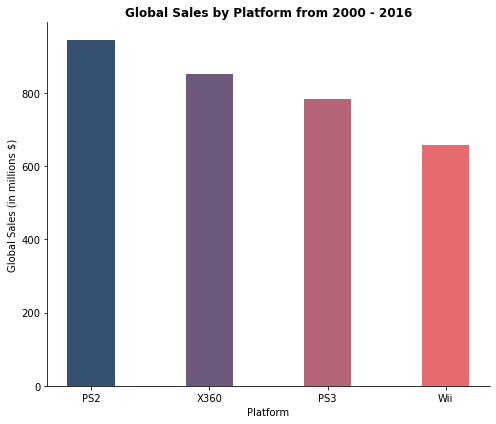

In [16]:
#Bargraph
plt.figure(figsize=(7,6))
bar_width = 0.4
custom_colours = ['#355070', '#6d597a', '#b56576', '#e56b6f']
plt.bar(top_4_platforms['Platform'], top_4_platforms['Global_Sales'], width=bar_width, color=custom_colours)

plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions $)')
plt.title('Global Sales by Platform from 2000 - 2016', fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()  
plt.show()

From the visual, the PS2 was released in November 2000 and was the highest highest selling console with 946 million games sold wordwide. The XBOX 360 was released in 2005 by Microsoft and followed to be the second best console in sales of games. Furthermore, this was followed by the PS3 and Wii games with both of their releases in 2006. Wii was especially popular due to its ability to be targeted to both gamers and non-gamers and its super interactive features. 

### 2. Pie charts

<Figure size 1152x864 with 0 Axes>

<AxesSubplot:>

([<matplotlib.patches.Wedge at 0x1ec06b952e0>,
 [Text(-1.0869422348299655, -0.1689869170759681, 'Grand Theft Auto: San Andreas'),
  Text(0.10686296459822264, -1.094796924912232, 'Grand Theft Auto: Vice City'),
  Text(1.0784159087629603, -0.21683894421196226, 'Gran Turismo 3: A-Spec'),
  Text(0.6383145169902278, 0.8958541049744274, 'Grand Theft Auto III'),
  Text(-0.4233674414533215, 1.0152635172787745, 'Gran Turismo 4')],
 [Text(-0.5928775826345266, -0.09217468204143714, '27.1%'),
  Text(0.05828888978084871, -0.5971619590430356, '21.1%'),
  Text(0.5882268593252511, -0.1182757877519794, '19.5%'),
  Text(0.3481715547219424, 0.4886476936224149, '17.1%'),
  Text(-0.2309276953381753, 0.5537801003338769, '15.2%')])

(-1.1115878382150095,
 1.122560935607712,
 -1.1182174972852748,
 1.1111136239567767)

Text(0.5, 1.0, 'Top 5 Games - PS2')

<AxesSubplot:>

([<matplotlib.patches.Wedge at 0x1ec06bf41c0>,
 [Text(-1.0718819481455477, -0.24712160820071072, 'Grand Theft Auto V'),
  Text(0.2040653338102604, -1.0809057958660908, 'Call of Duty: Black Ops II'),
  Text(1.0796399466964857, -0.21065988108135314, 'Call of Duty: Modern Warfare 3'),
  Text(0.6418004519824172, 0.8933600505032476, 'Call of Duty: Black Ops'),
  Text(-0.4307827601092997, 1.0121394239889157, 'Gran Turismo 5')],
 [Text(-0.5846628808066623, -0.13479360447311492, '29.4%'),
  Text(0.11130836389650565, -0.5895849795633222, '19.3%'),
  Text(0.5888945163799012, -0.11490538968073806, '18.6%'),
  Text(0.3500729738085912, 0.4872873002744986, '17.7%'),
  Text(-0.23497241460507254, 0.5520760494484993, '15.0%')])

(-1.1106327707357708,
 1.1205439584354073,
 -1.1218439165151777,
 1.1098174170348778)

Text(0.5, 1.0, 'Top 5 Games - PS3')

<AxesSubplot:>

([<matplotlib.patches.Wedge at 0x1ec06c31d90>,
 [Text(-0.938909938568984, -0.5731039410581531, 'Wii Sports'),
  Text(0.7575908335793741, -0.7975312714097859, 'Mario Kart Wii'),
  Text(1.073471303624304, 0.2401236354362847, 'Wii Sports Resort'),
  Text(0.44777774521946473, 1.0047363290367142, 'Wii Play'),
  Text(-0.47355147202293296, 0.9928489327913455, 'New Super Mario Bros. Wii')],
 [Text(-0.5121326937649002, -0.3126021496680835, '39.7%'),
  Text(0.41323136377056763, -0.4350170571326104, '17.1%'),
  Text(0.585529801976893, 0.13097652841979163, '15.8%'),
  Text(0.24424240648334436, 0.5480379976563895, '13.9%'),
  Text(-0.25830080292159974, 0.5415539633407338, '13.6%')])

(-1.1141306579224346,
 1.1133179641289999,
 -1.1227289107563294,
 1.1035916911145125)

Text(0.5, 1.0, 'Top 5 Games - Wii')

<AxesSubplot:>

([<matplotlib.patches.Wedge at 0x1ec06c97c40>,
 [Text(-1.0881634298295535, -0.16093585673050745, 'Kinect Adventures!'),
  Text(0.056441792520816894, -1.098551011131043, 'Grand Theft Auto V'),
  Text(1.0446907631456734, -0.344414299061625, 'Call of Duty: Modern Warfare 3'),
  Text(0.7518639399922457, 0.8029325100774889, 'Call of Duty: Black Ops'),
  Text(-0.3700084157703853, 1.0359023951411106, 'Call of Duty: Black Ops II')],
 [Text(-0.5935436889979382, -0.08778319458027678, '26.9%'),
  Text(0.030786432284081938, -0.5992096424351143, '20.1%'),
  Text(0.5698313253521855, -0.18786234494270454, '18.2%'),
  Text(0.410107603632134, 0.4379631873149939, '18.0%'),
  Text(-0.20182277223839196, 0.5650376700769694, '16.9%')])

(-1.1112231695855848,
 1.1174557455804222,
 -1.1108088157920422,
 1.1168386917189213)

Text(0.5, 1.0, 'Top 5 Games - X360')

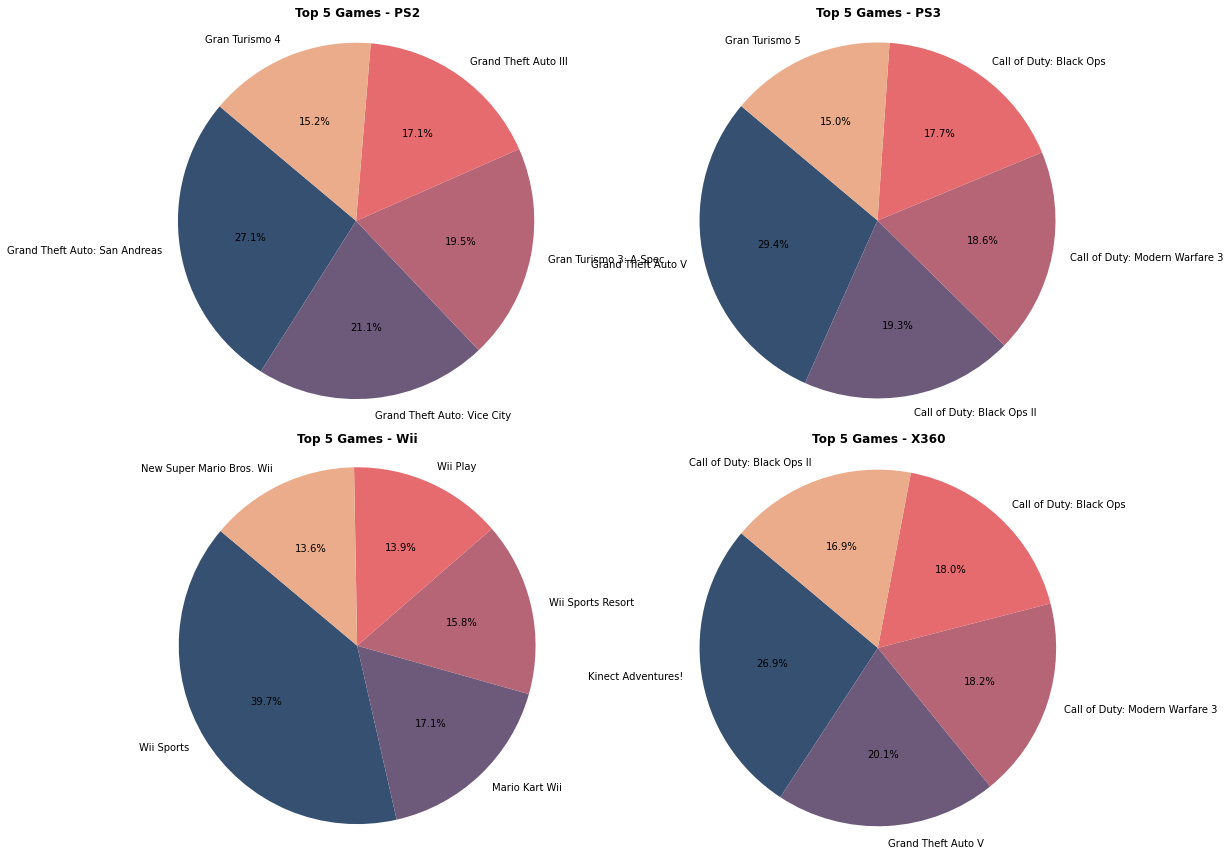

In [17]:
#Filter data according to taking the top four platforms that had the highest sales as seen above
selected_platforms = ['PS2', 'X360', 'Wii', 'PS3']
filtered_2 = filtered_data[filtered_data['Platform'].isin(selected_platforms)]

#Now we group the data by the platform and select the top five games sold globally for each platform
grouped_2 = filtered_2.groupby('Platform')
top_five_games = {}

for platform, group in grouped_2:
    sorted_group = group.sort_values(by='Global_Sales', ascending=False)
    top_five_games[platform] = sorted_group.head(5)

#Making the pie chart 
plt.figure(figsize=(16, 12))
colours = ['#355070', '#6d597a', '#b56576', '#e56b6f', '#eaac8b']

for platform, data in top_five_games.items():
    labels = data['Name']
    sizes = data['Global_Sales']

    plt.subplot(2, 2, list(top_five_games.keys()).index(platform) + 1)
    plt.pie(sizes, labels=labels, colors=colours, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Top 5 Games - {platform}', fontweight='bold')

plt.tight_layout()
plt.show()


From the visualisation, PS3, XBOX 360, and PS2 had Grand Theft Auto in various series being the most popular and highest selling game. Call of duty was especially popular globally for XBOX 360 and PS3. Wii games had their own selection mostly with Wii sports and the Mario series of games. 

### 3. Checking the proportions of sales for each region

In [18]:
#Getting the total number of sales from 2000 - 2016 for each region we have data available for
na_sales_total = filtered_data['NA_Sales'].sum()
eu_sales_total = filtered_data['EU_Sales'].sum()
jp_sales_total = filtered_data['JP_Sales'].sum()
other_sales_total = filtered_data['Other_Sales'].sum()

total_sales = na_sales_total + eu_sales_total + jp_sales_total + other_sales_total

#Proportions
na_prop = round((na_sales_total/total_sales)*100, 2)
eu_prop = round((eu_sales_total/total_sales)*100, 2)
jp_prop = round((jp_sales_total/total_sales)*100, 2)
other_prop = round((other_sales_total/total_sales)*100, 2)

#Printing the output
print("Proportion of Video Games Sold per Region (2000-2016):")
print(f"North America Sales Proportion: {na_prop}%")
print(f"Europe Sales Proportion: {eu_prop}%")
print(f"Japan Sales Proportion: {jp_prop}%")
print(f"Other Sales Proportion: {other_prop}%")

Proportion of Video Games Sold per Region (2000-2016):
North America Sales Proportion: 50.96%
Europe Sales Proportion: 30.41%
Japan Sales Proportion: 7.83%
Other Sales Proportion: 10.79%


### 4. Heatmap

I create a heatmap in order to analyse the relationship between the sales of different video games genres overtime; taking the global sales. 

In [24]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6747 entries, 0 to 9768
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6747 non-null   object 
 1   Platform         6747 non-null   object 
 2   Year_of_Release  6747 non-null   int64  
 3   Genre            6747 non-null   object 
 4   Publisher        6747 non-null   object 
 5   NA_Sales         6747 non-null   float64
 6   EU_Sales         6747 non-null   float64
 7   JP_Sales         6747 non-null   float64
 8   Other_Sales      6747 non-null   float64
 9   Global_Sales     6747 non-null   float64
 10  Critic_Score     6747 non-null   float64
 11  Critic_Count     6747 non-null   float64
 12  User_Score       6747 non-null   float64
 13  User_Count       6747 non-null   float64
 14  Developer        6747 non-null   object 
 15  Rating           6747 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 896.1+ KB


In [25]:
#Firstly we create a pivot table
pivot_table = filtered_data.pivot_table(index='Genre', columns='Year_of_Release', values='Global_Sales', aggfunc='sum')

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='Year_of_Release', ylabel='Genre'>

Text(0.5, 51.0, 'Year')

Text(87.0, 0.5, 'Genre')

Text(0.5, 1.0, 'Global Sales Over Time by Genre')

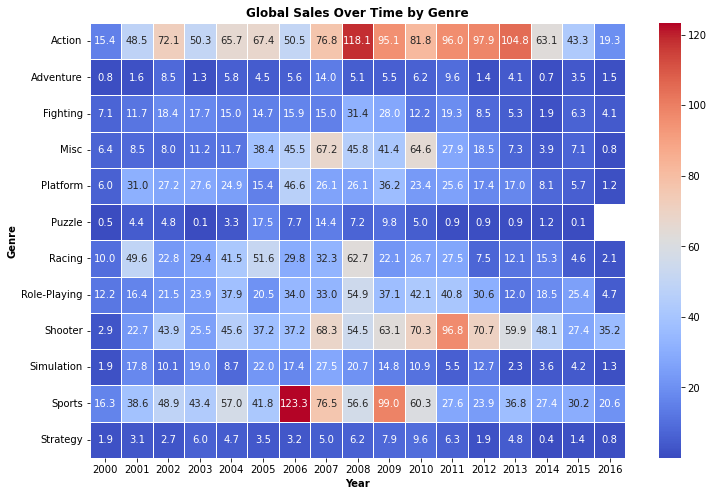

In [31]:
#Plotting the heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Genre', fontweight='bold')
plt.title('Global Sales Over Time by Genre', fontweight='bold')

plt.show()

From the heatmap, it is evident that during the era of 2006 - 2008 the Sports genre was on a rise. This was due to the release of Wii with their iconic and popular release of Wii sports. 
During 2008 - 2013, Shooting games were popular due to the Call of Duty franchise and its increasing popularity on a variety of gaming consoles. Additionally, the Action genre is showing to be the most popular genre out of all with its consistency in sales of video games overtime. During 2006 - 2013 the Action genre shows increasing popularity due to the Grand Theft Auto series. Its understanding of gamers, pop culture references, mission selection, and creating hilarious scenarios in the video game gave it the ultimate gamers experience. 

### Final Remarks 

From the above visualisations, we can derive some ket insights into the popularity of different video games and their growth and decline overtime in different regions and in aggregate worldwide. 
From the above analysis, I have created an A4 poster of the different visualisations created above on Canva to better represent the analysis and make it easier to understand for the general audience. The poster created has short descriptions to take the viewer through a story for deeper understanding while going through the poster and retrieving key insights. 